<a href="https://colab.research.google.com/github/priyadarshani17/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Cardiovascular Risk Prediction

---


### **Project Type**    - ML Classification


---




#### **Contribution**    - Team

##### **Team Member 1** -Devarshi Dwivedi
##### **Team Member 2** -Jay Pardeshi
##### **Team Member 3** -Priyadarshini Gaikwad
##### **Team Member 4** -Samarjeet singh
##### **Team Member** 5 -Anas Ahmad

## **Problem Statement**

---



The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes. 

## **Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


---




## **Dataset Description**


---



### **Demographic:**
• Sex: male or female("M" or "F")

• Age: Age of the patient

### **Behavioral:**
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.


### **Medical( history):**
• BP Meds: whether or not the patient was on blood pressure medication 

• Prevalent Stroke: whether or not the patient had previously had a stroke 

• Prevalent Hyp: whether or not the patient was hypertensive 

• Diabetes: whether or not the patient had diabetes 


### **Medical(current):**
• Tot Chol: total cholesterol level

• Sys BP: systolic blood pressure

• Dia BP: diastolic blood pressure 

• BMI: Body Mass Index 

• Heart Rate: heart rate 

• Glucose: glucose level 


### **Predict variable (desired target)**
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **Project Description -**


---



Heart disease is the major cause of morbidity and mortality globally: 

It accounts for more deaths annually than any other cause. According to the
World Health Organizartion, an estimated 17.9 million people died from heart diseases in 2016, representing 31% of all global deaths. Over three quarters of these deaths took place in low- and middle-income countries.

Of all heart diseases, coronary heart disease is by far
the most common and the most fatal. In the United States, for example, it
is estimated that someone has a heart attack every 40 seconds and about
805,000 Americans have a heart attack every year (CDC 2019).

Doctors and scientists alike have turned to machine learning (ML)
techniques to develop screening tools and this is because of their
superiority in pattern recognition and classification as compared to other
traditional statistical approaches.

In this project, We will be giving a walk through on the development
of a screening tool for predicting whether a patient has a 10-year risk of
developing coronary heart disease(CHD) using different Machine Learning
techniques.

## **Coronary heart disease**


---



Coronary heart disease occurs when the flow of oxygen-rich blood to the heart muscle is blocked or reduced.

This puts an increased strain on the heart, and can lead to:

- angina – chest pain caused by restricted blood flow to the heart muscle
- heart attacks – where the blood flow to the heart muscle is suddenly blocked
- heart failure – where the heart is unable to pump blood around the body properly


---



## **CAUSES**


---


- High blood pressure

- Smoking

- High cholesterol

- Diabetes

- Inactivity

- Being overweight or obese


---



## **So, where does machine learning fit in ?**


---


Due to the multi-contributory risk factors such as high blood pressure, high cholesterol, diabetes and various others it gets very constrained to identify the risk factors for some of the patients. That's why we are turning to data visualization and machine learning for predicting the disease to avert the risks.
Machine learning (ML), due to its distinction in pattern detection and classification, proves to be effective in assisting decision making and risk assessment from the large quantity of data produced by the healthcare industry on heart disease.

## **Dataset Overview**


---



### **Importing Libraries**

In [40]:
# Importing libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

## **Loading Dataset**


---



In [41]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Loading dataset

path = '/content/drive/MyDrive/capstone project 3/data_cardiovascular_risk.csv'

In [25]:
df = pd.read_csv(path , index_col = "id")

### **Dataset First View**


---



In [26]:
# first 5 entries

df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [27]:
# last 5 entries

df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [29]:
# Dataset Columns 

df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### **Detailed Dataset Information**


---



In [30]:
# detailed description of our dataset.

df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


## **Data Cleaning**


---



#### **Duplicate Values**

In [31]:
# Dataset Duplicate Value Count

# duplicates any ?
len(df[df.duplicated()])

0

**NO Duplicates**

#### **Missing Values/Null Values**


---



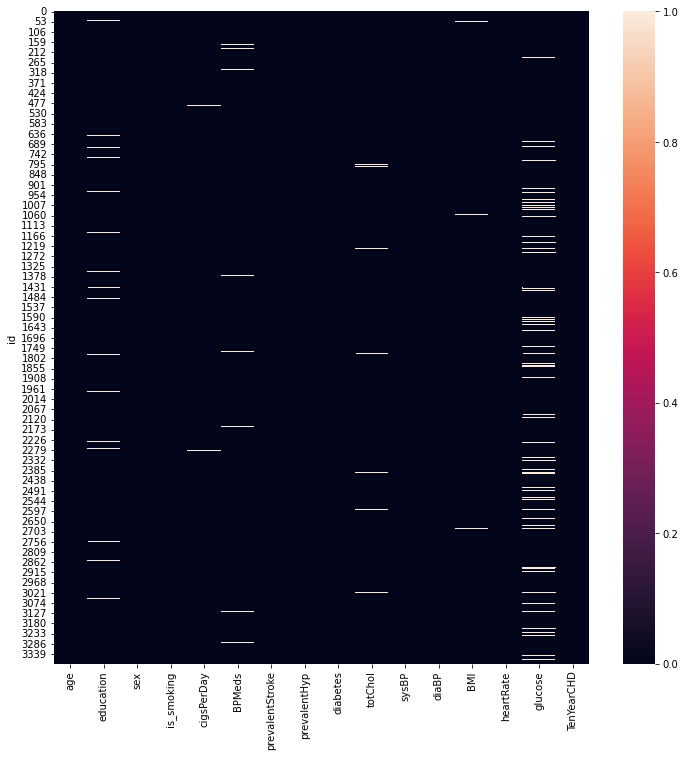

In [32]:
# Missing Values/Null Values 

# Plotting the heatmap for missing values 
missing_values = df.isnull()
plt.figure(figsize=(12,12))
sns.heatmap(missing_values)

In [33]:
# count of missing/null values 

df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**NULL values are present in - 'glucose', 'education', 'BPMeds', 'totChol', 'cigsPerDay', 'BMI', 'heartRate'.**

In [34]:
# filling the null values with median and mode for numeric and categorical columns respectively

df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace = True)
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [35]:
# cheching the null values in our dataset

df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

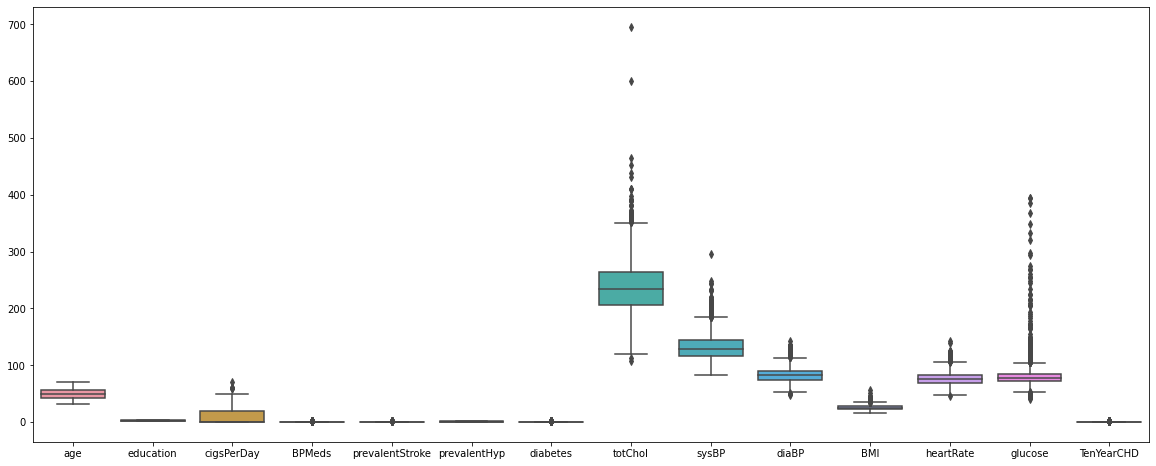

In [36]:
# checking outliers

plt.figure(figsize=(20,8), facecolor='w')
sns.boxplot(data=df)
plt.show()


- **Outliers are present in totChol, cigsPerDay, diaBP,sysBP,hearRate,glucose.**

- **Glucose feature has highest number of outliers.**

- **Outliers are important here.**

- **There could be a possibility that a person might have high risk of the same and removing it, would make this model defective**

## **Visualizing Outliers**


---



In [43]:
# Visualization the overall data and the outliers:

plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}')
  plt.tight_layout()

NameError: ignored

<Figure size 1296x864 with 0 Axes>

In [39]:
# Visualization the overall data and the outliers:

plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}')
  plt.tight_layout()

NameError: ignored

<Figure size 1296x864 with 0 Axes>

- Age range (30 - 70).

- cigsperday is ranging from (0 - 70).

- total cholestrol is ranging from (100 - 700).

- sysbp is ranging from (100 - 300).

- diabp is ranging from (40 - 140).

- BMI is ranging from (15 - 55).

- heart rate is ranging from (40 - 140).

- glucose level is from (40 - 400).

### **EDA and Understand the relationships between variables**


---



## **Univariate Analysis**


---



**Plotting pie chart to get the ten year risk**

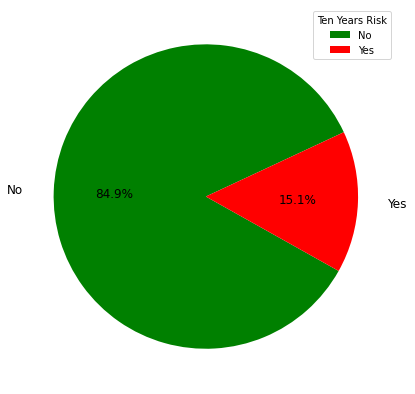

In [44]:
#plotting pie chart to get the ten year risk

my_labels = ['No','Yes']
my_colors = ['green','red']
sizes = df['TenYearCHD'].value_counts()
fig = plt.figure(1, figsize=(7,7))
plt.pie(sizes,labels = my_labels,colors = my_colors,labeldistance = 1.2,autopct='%1.1f%%',startangle = 25, pctdistance = 0.6,textprops={'fontsize': 12} )
plt.legend(title = 'Ten Years Risk')
plt.show()

**Here we can see there are 15.1% people in our dataset are at a risk for cardiovascular disease and 84.9% people are safe**

### **Plotting to get the no of risky patients**

Text(0.5, 1.0, 'prevalentStroke')

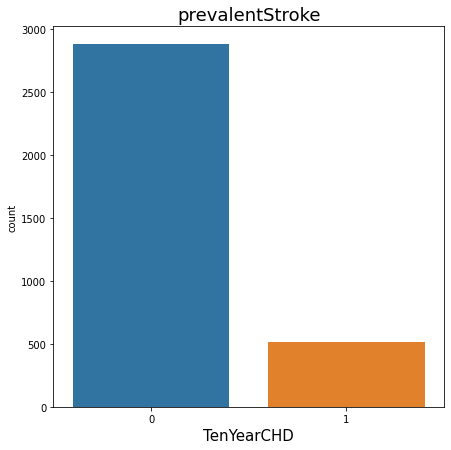

In [45]:
#plotting countplot to get the no of risky patients

fig, ax = plt.subplots(figsize = ( 7 , 7 ))
sns.countplot(x="TenYearCHD", data=df)
ax.set_xlabel( "TenYearCHD" , size = 15 )
ax.set_title( "prevalentStroke" , size = 18 )
     

**Above we can see the count of risky patient, around 500 patients are in risk and approx. 2800 patient are safe.**

**15% data of one class and 85% of another class, this shows imbalance between the class**

**Number of risky patients with respect to age**

Text(0.5, 1.0, 'prevalentStroke')

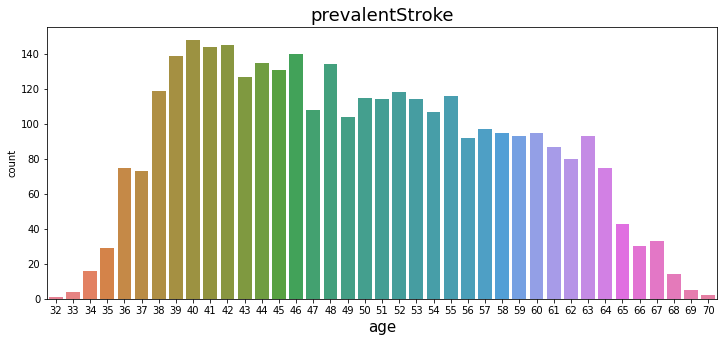

In [46]:
# Number of risky patients with respect to age

fig, ax = plt.subplots(figsize = ( 12 , 5 ))
sns.countplot(x="age", data=df ,palette='husl')
ax.set_xlabel( "age" , size = 15 )
ax.set_title( "prevalentStroke" , size = 18 )

**Here we can see there is more risk of cardiovascular disease in patients of age between 51 to 63.**

### **Checking continous, discrete and numerical features**

In [ ]:
# Lets check the discrete and continuous features

categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

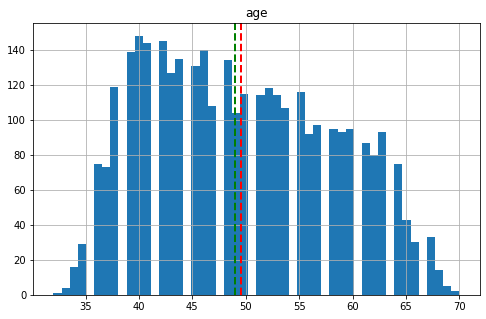

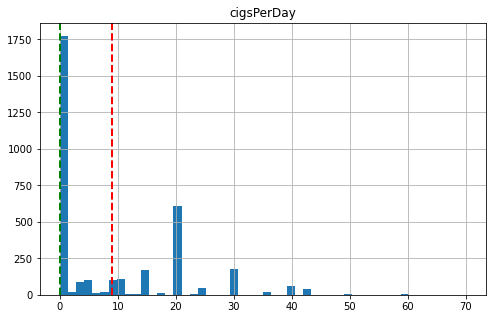

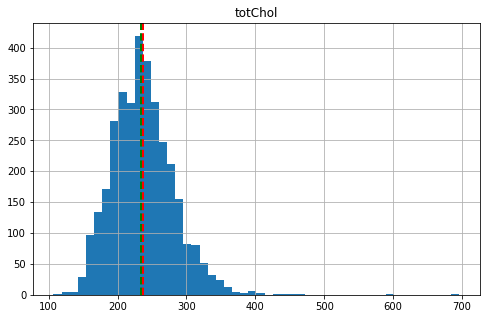

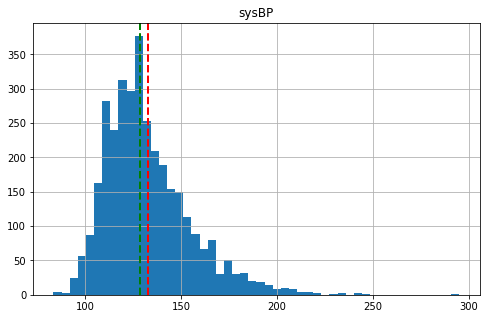

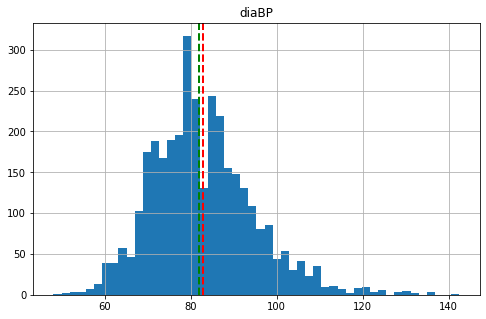

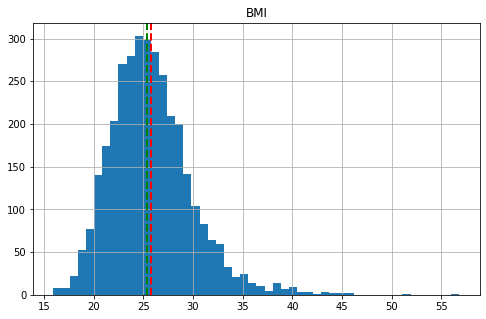

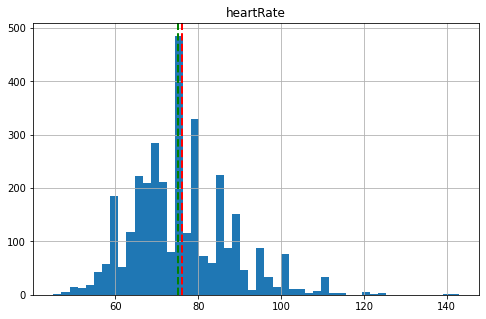

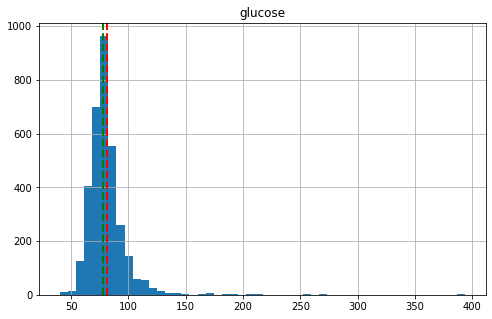

In [48]:
# plot a bar plot for each numerical feature

for col in numeric_features:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)     
    ax.set_title(col)
plt.show()

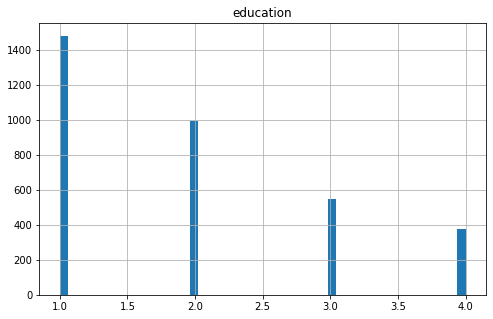

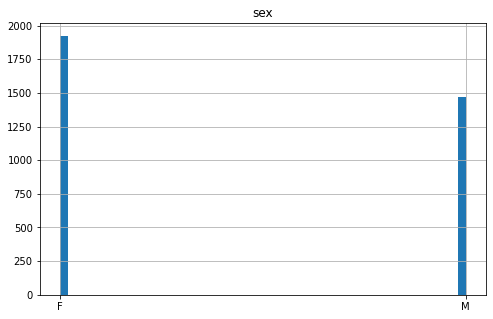

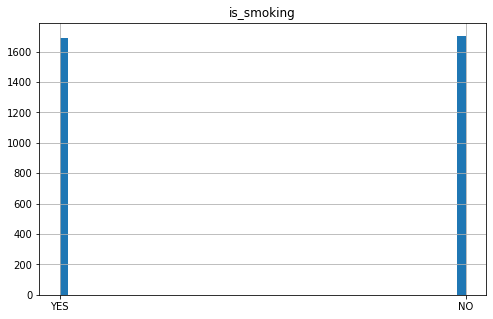

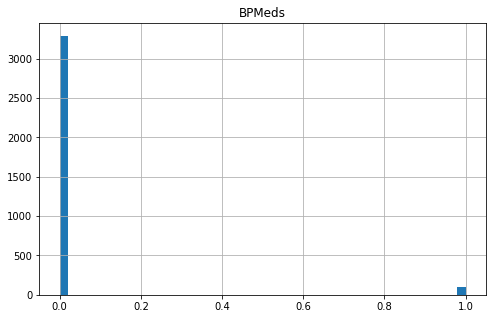

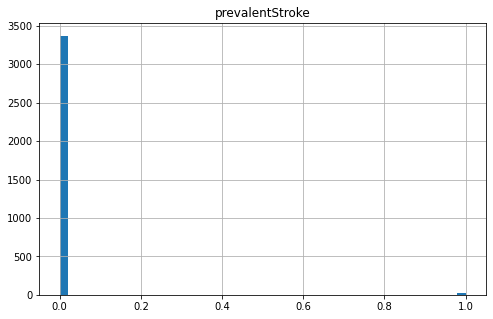

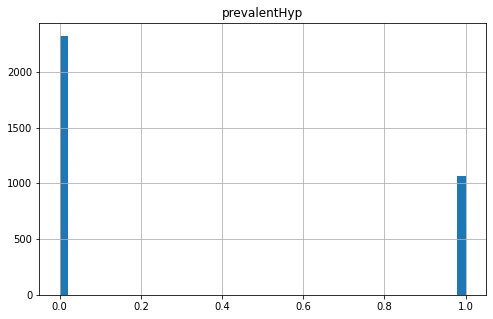

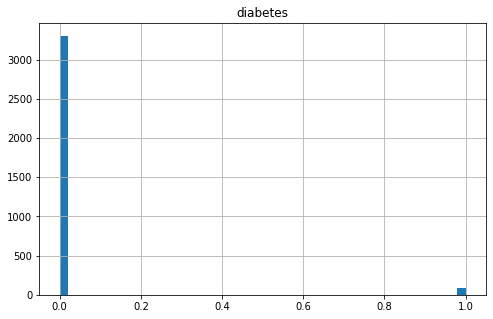

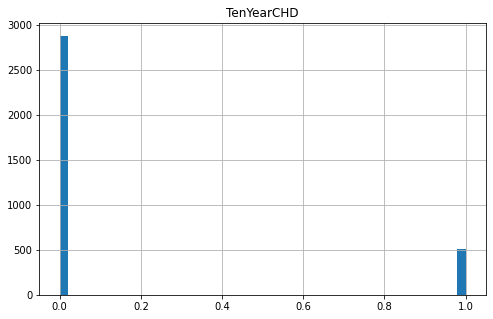

In [49]:
# plot a bar plot for each categorical feature

for col in categorical_features:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)    
    ax.set_title(col)
plt.show()

- **People in our dataset are divided into four levels in education - 1, 2 ,3 and 4**
- **Females are more compared to males in our dataset.**
- **Number of smokers and non-smokers are Approx equal.**
- **Only few people on BP medication are there in our dataset.**
- **A few people had a stroke in the past.**
- **A few people had diabates.**


## **Subplots for all the features to represent their mean, median and distributions**


---



In [ ]:
# subplots for all the features to represent their mean, median and distributions

plt.figure(figsize=(18,16))

for i, column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

## **Bivariate Analysis**


---



### **Plotting education levels vs people having diseases**

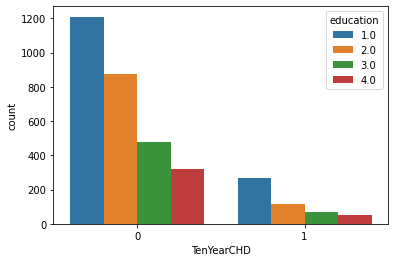

In [50]:
# count plot of education levels people having diseases

sns.countplot(x ='TenYearCHD', hue ='education', data = df)

**Education also plays an important role here. Those who represent education=4 are less in chd**

### **Plotting for categorical columns**

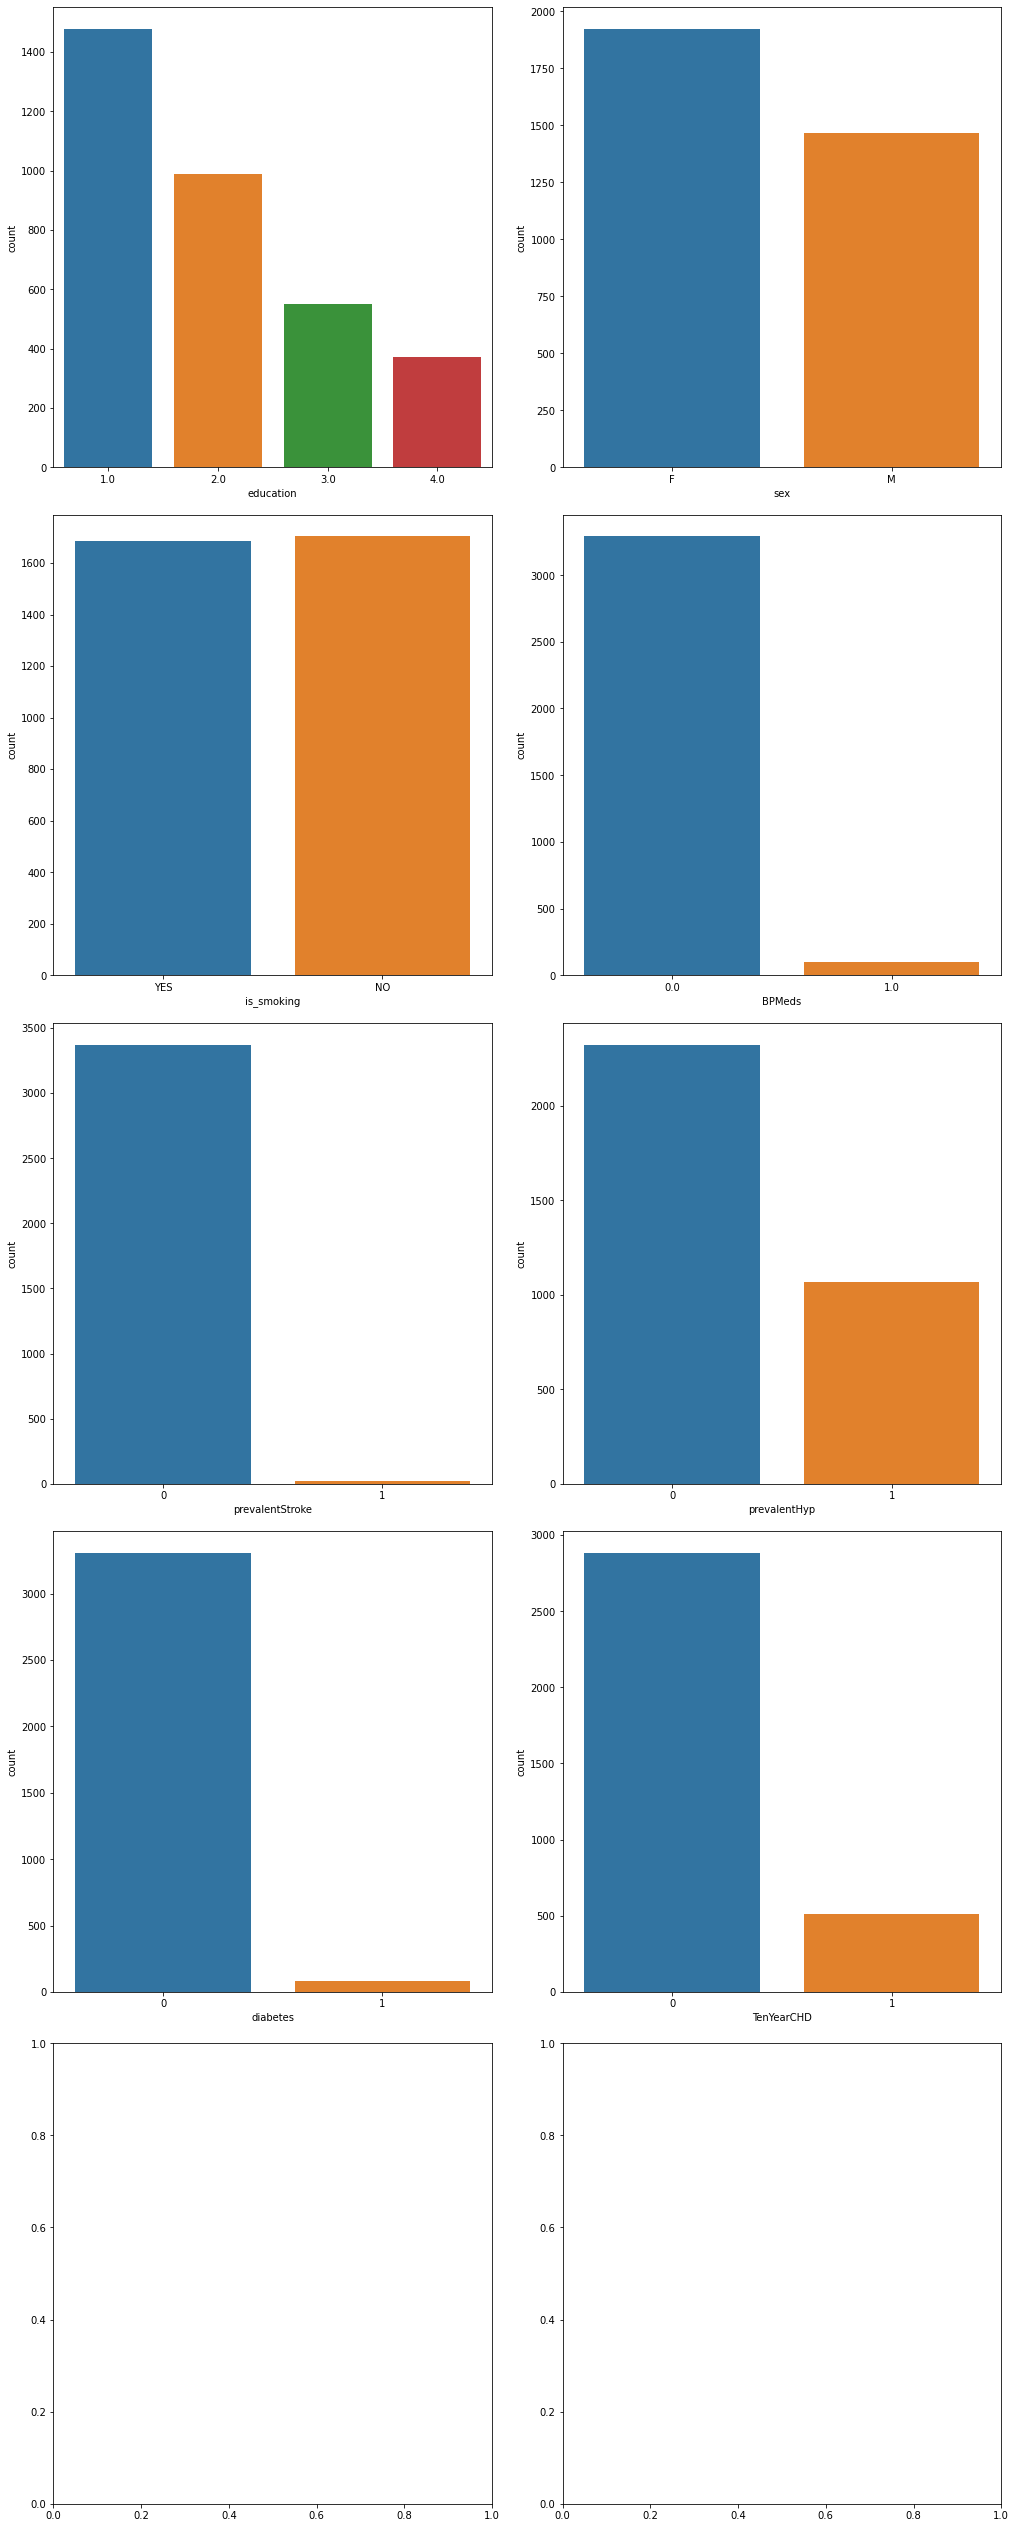

In [51]:
#plotting for categorical columns

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

**Number of people who were not on BPmeds, who did not had a stroke in past. Those who dont have diastolic blood pressure are very less.**

### **Plotting age & sex vs risk**

In [52]:
# plotting age & sex vs risk

at_risk = "At risk"
no_risk= "No risk"

Text(0.5, 1.0, 'Male')

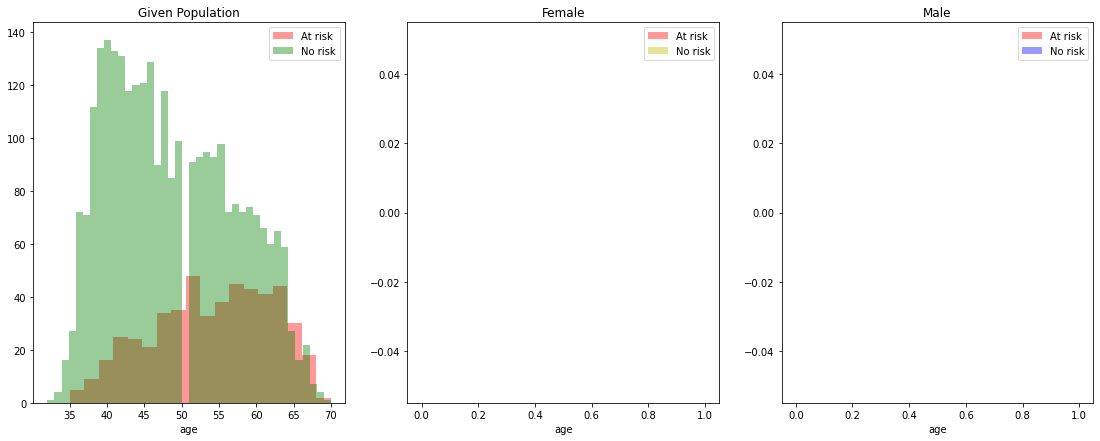

In [53]:
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(19,7))
ax= sns.distplot(df[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(df[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g',kde=False)
ax.legend()
ax.set_title("Given Population")
women= df[df['sex']==0]
men= df[df['sex']==1]
ax= sns.distplot(women[women['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(women[women['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='y',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[2],color='r',kde=False)
ax= sns.distplot(men[men['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[2],color='b',kde=False)
ax.legend()
ax.set_title("Male")

- **Both sexes, in Age group of 50 and above have high risk of heart disease.**
- **Men above 45 years are usually at risk, where as women above 55 years are usually at risk.**
- **Men are more likely to have heart disease compared to women.**

### **Dividing the age into three section and plotting**

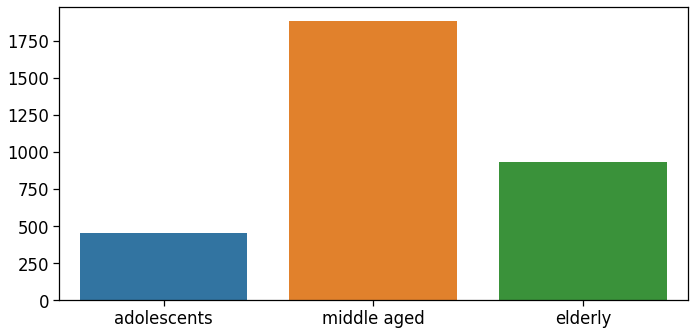

In [54]:
#dividing the age into three section

Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['adolescents','middle aged','elderly'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

**Count of Middle aged people are highest followed by elderly.**

### **Plotting heartrate vs cig per day**

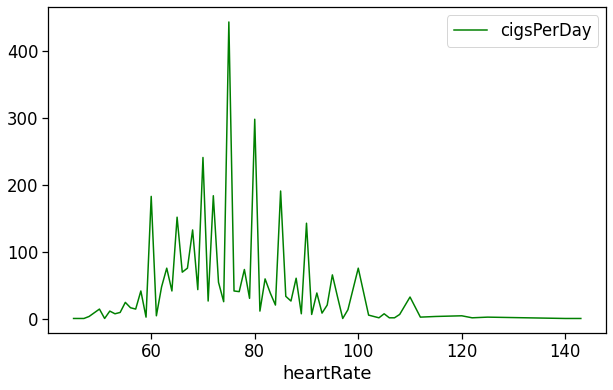

In [55]:
#creating dataframe of heartrate and cig per day

heartRate_VS_cig_per_day=df.groupby('heartRate')['cigsPerDay'].count()
heartRate_VS_cig_per_day_df=pd.DataFrame(heartRate_VS_cig_per_day).reset_index()
     

heartRate_VS_cig_per_day_df.plot(x='heartRate',y='cigsPerDay', figsize=(10,6),color='g')

**Here we can see most people smoke cigarettes between 1 to 10 approx. and their heart rate lies between 60 to 100.**

### **Age wise smoking ratio**

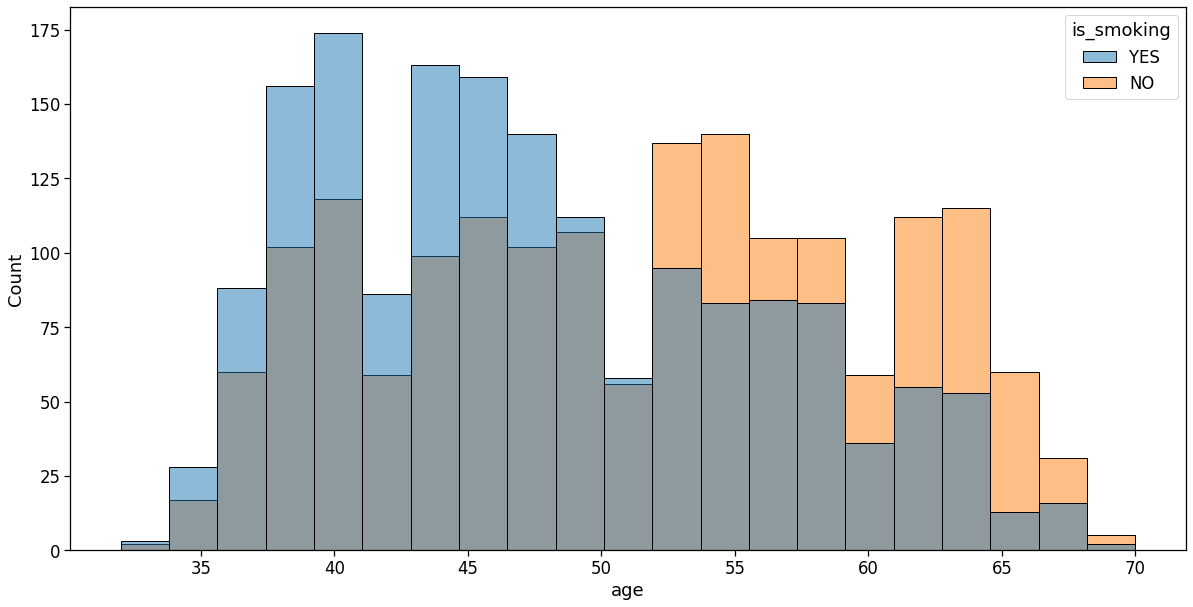

In [56]:
# age wise smoking ratio

plt.figure(figsize=(20,10), facecolor='w')
sns.histplot(x="age",data=df,hue="is_smoking")

**Number of smokers between the age group of 35 to 50 is highest i.e. Young and middle aged**

### **Age and smoking vs risk factor**

Text(0.5, 1.0, 'NonSmokers')

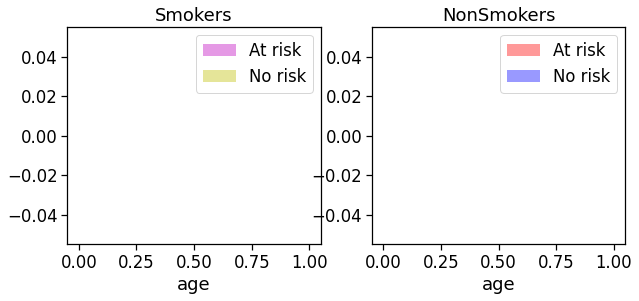

In [57]:
# age and smoking vs risks

smoking= df[df['is_smoking']==1]
non_smoking= df[df['is_smoking']==0]
fig , axes= plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax= sns.distplot(smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='m',kde=False)
ax= sns.distplot(smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='y',kde=False)
ax.legend()
ax.set_title("Smokers")

ax= sns.distplot(non_smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(non_smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='b',kde=False)
ax.legend()
ax.set_title("NonSmokers")

**Age clearly plays an important role irrespetive of smoking or not, which is clearly evident from the above two plots.**

### **CigsPerDay & Sex vs Risk**

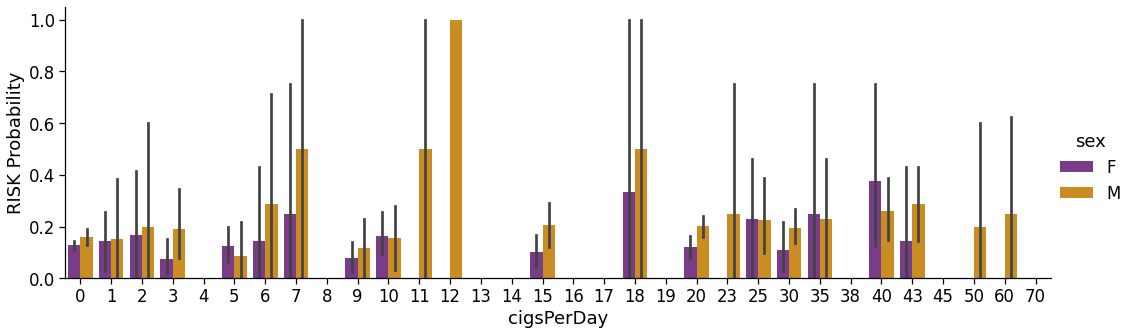

In [58]:
# CigsPerDay & Sex vs Risk

df['cigsPerDay']=df['cigsPerDay'].astype(int)
g=sns.factorplot('cigsPerDay','TenYearCHD',kind='bar',
                    data=df,hue='sex',aspect=3, palette="CMRmap")
g=g.set_ylabels("RISK Probability")

**Male have more tendency of developing risk than females, since smoking levels of male is higher than that of female smokers**

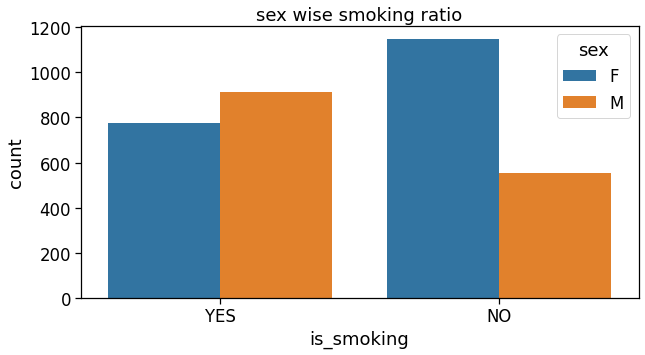

In [59]:
# males and females smoker
plt.figure(figsize=(10,5))
sns.countplot(x='is_smoking', hue = 'sex', data=df)
plt.title('sex wise smoking ratio')

plt.show()

**Number of male smokers is higher than female smokers**

### **Which gender is more prone to CHD**

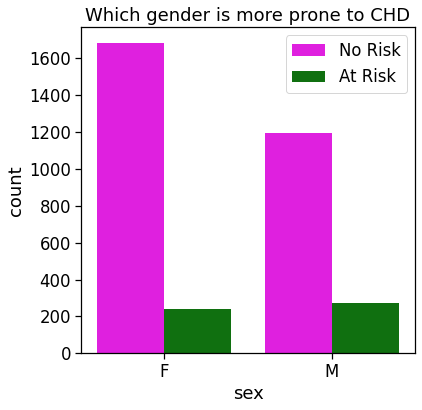

In [60]:
# plotting genderwise
my_palette = {0 : 'magenta' , 1 : 'green'}
plt.figure(figsize = (6,6))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

**The number of males and females which are at risk of CHD is equal.**

**The number of females who are not at risk is higher than that of male**

### **Systolic BP with respect to age**

Text(0.5, 1.0, 'Age vs sysBP')

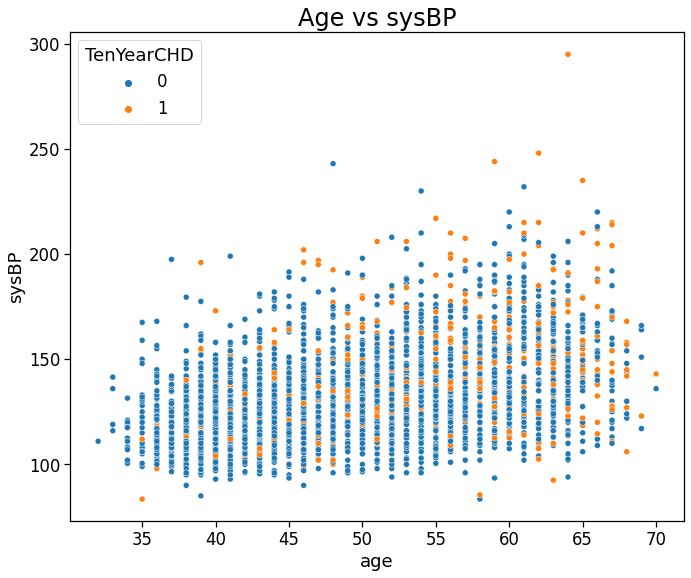

In [61]:
# Systolic BP with respect to age

fig, ax = plt.subplots(figsize = ( 11 , 9 ))
sns.scatterplot(data=df, x="age", y="sysBP", hue="TenYearCHD")
ax.set_title( "Age vs sysBP" , size = 24 )

**Here we can see age lies between 32 to 70 and most of the people's systolic BP lies between 90 to 200**

### **Diabetes vs heart disease**

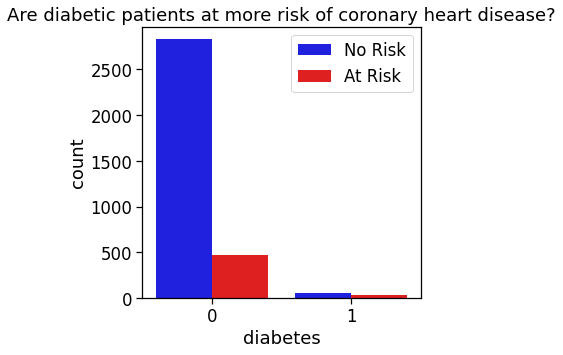

In [62]:
# diabetes vs heart disease 

my_palette = {0 : 'blue' , 1 : 'red'}
plt.figure(figsize = (5,5))
sns.countplot(x = df['diabetes'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Diabetic patients are at more risk of CHD.**

### **Plotting hypersensitivity vs risk**

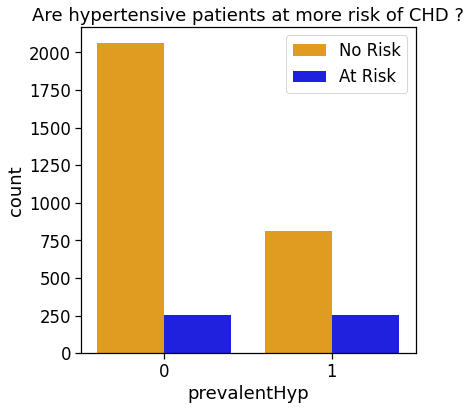

In [63]:
# hypersensitivity vs risk

plt.figure(figsize = (6,6))
my_palette = {0 : 'orange' , 1 : 'blue'}
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Out of all the people who are not Hypertensive, the number of people getting CHD is very less.**
**People who are hypertensive has more chances of getting CHD.**

### **Patients with blood pressure on medication vs risk factor**

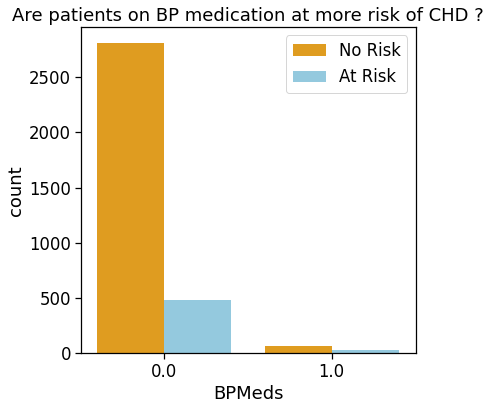

In [64]:
# patients with blood pressure on medication vs risk factor

my_palette = {0 : 'orange' , 1 : 'skyblue'}
plt.figure(figsize = (6,6))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Patients on BP medication are more prone to CHD where as those who are not on BP medication has severely less chances of getting CHD.**

### **Had a stroke earlier vs risk factor**

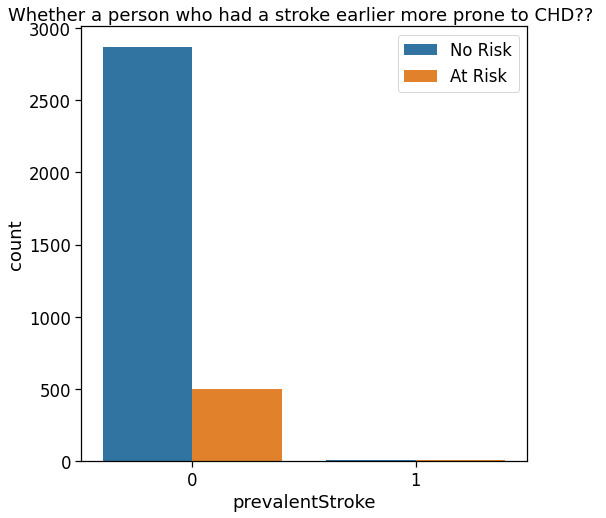

In [65]:
# had a stroke earlier vs risk factor

plt.figure(figsize = (8,8))
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'])
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

**The person who previously had a heart stroke are more at risk to CHD than those who did not**

### **Checking Linearity**


---



In [ ]:
# Checking Linearity

independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]

plt.figure(figsize=(20,20))
for n,column in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df[column], y =df['TenYearCHD'],line_kws={"color": "magenta"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

## **Multivariate Analysis**


---



### **Age vs with numerical values (cigsperday, total cholestrol, sysbp, diabp,glucose, heartrate and BMI)**




In [ ]:
# age vs with other numerical values

for i in numerical_columns:
  if i!='age':
    sns.catplot(x="age", y=i, hue="TenYearCHD", kind="bar", data=df,height=5, aspect=3)

- **The people who were under the risk of CVR were from the age>34. And age did not matter to any of other numerical variables. We can see same level of measures such as BP, BMI etc., for all age group.**

- **The cholestrol level for these peple is slighly more when we compare it with the people who are not at risk of CVR. And at the age of 70, even though they were having slighly low level of cholestrol, they were at risk of CVR.**

- **If we consider sysBP, diaBP, heart rate and BMI together for the overall conclusion, we can conclude that all the people who are at risk are having high values of these measures than the people who are not at risk of CVR**

### **Plotting Education vs numerical values (cigsperday, total cholestrol, sysbp, diabp,glucose, heartrate and BMI)**

In [ ]:
# Education and CVR vs other numerical columns

for i in numerical_columns:
  sns.catplot(x="education", y=i, hue="TenYearCHD", kind="violin", data=df,height=4, aspect=2)

- **The people who had the basic level education are at more risk of CVR when we compare the levels of education.**

- **Cholestrol level is high for fewer people in education level 2. But people who had basic education were at more risk of CVR.**

- **People with only the basic education are having more BP(considering sysBP,diaBP together), heartrate and BMI as well. So they are directly at more risk of CVR.**

- **People with the highest education (Education 4) are having controlled balanced glucose level. But other fewer people with other education levels are having very high cholestrol. We cna see a peak in glucose level in education leval 3 group people**

### **Plotting sex vs numerical values (cigsperday, total cholestrol, sysbp, diabp,glucose, heartrate and BMI)**

In [ ]:
# Sex and CVR vs other numerical columns

for i in numerical_columns:
  sns.catplot(x="sex", y=i, hue="TenYearCHD", kind="bar", data=df,height=4, aspect=2)

- **Females are having high BP, high heart rate, high BMI and even high values of glucose. But the females who are between the age group of 50-70 are at more risk of CVR.**

- **Males between the age group 40-70 are at more risk of CVR.**

- **Whoever had the highest glucose level amongst men all comes under the risk of CVR.**

- **We can see that some of the highest cholestrol values are obtained by men (alone). This might be the reason that they are at high risk of CVR.**

- **But many men maintained normal range of BP, heartrate and BMI.**

### **Min-Max scaling and Distribution plot of all numerical variables**


---



In [ ]:
# Distribution plot of all numerical variables
from sklearn.preprocessing import MinMaxScaler
# Min max scaler
column_names = numerical_columns

# taking columns to do the minmaxscaling
cardio_2 = pd.DataFrame()
# using standardization as both numeric columns are in different scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[numerical_columns])
cardio_2 = pd.DataFrame(scaler.fit_transform(df[numerical_columns]))
cardio_2.columns = column_names

sns.set(rc = {'figure.figsize':(15,8)})
cardio_2.plot.kde()
plt.title("Distribution plot")
plt.xlabel("Numerical variables")

**We can observe that there are many people with high level of glucose followed by cholestrol. It might be that the lifestyle of people are contributing more to these values. So we observe some peaks in these vlaues**

## **Correlation Heatmap**


---



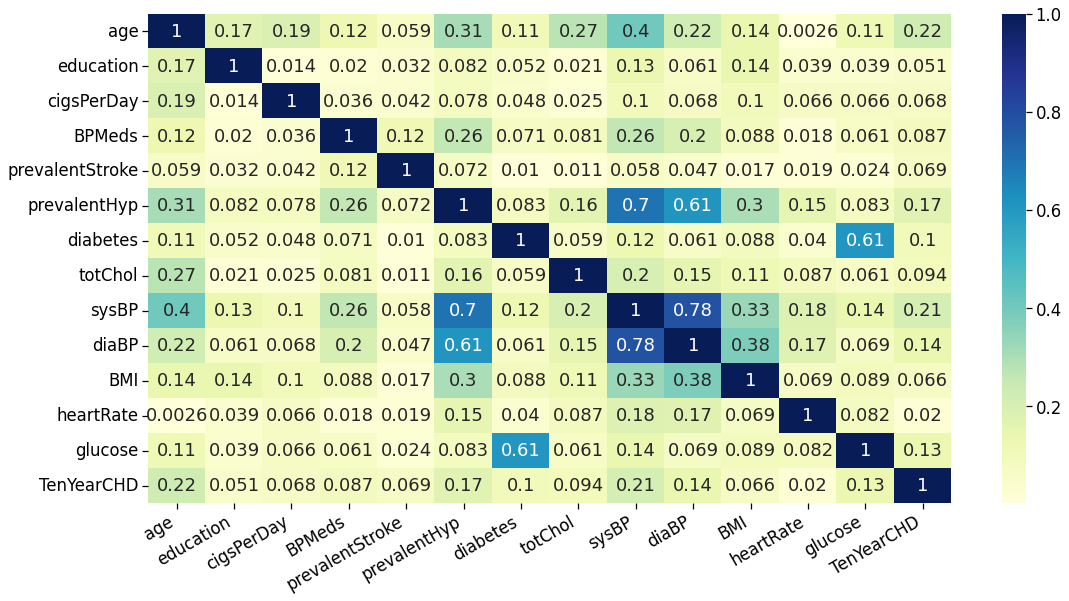

In [66]:
# Correlation Heatmap visualization 

plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='YlGnBu')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

- **sysBP and diaBP show the strongest positive correlation**
- **is_smoking and cigsPerDay are positively co-related**
- **diabetes and glucose are positively co-related**
- **Correlation of diabetes with glucose and prevalentHyp with diaBP is equal**

### **Plotting Univariate, bivariate and multivariate analysis pair plot for Overview**


---



<Figure size 360x360 with 0 Axes>

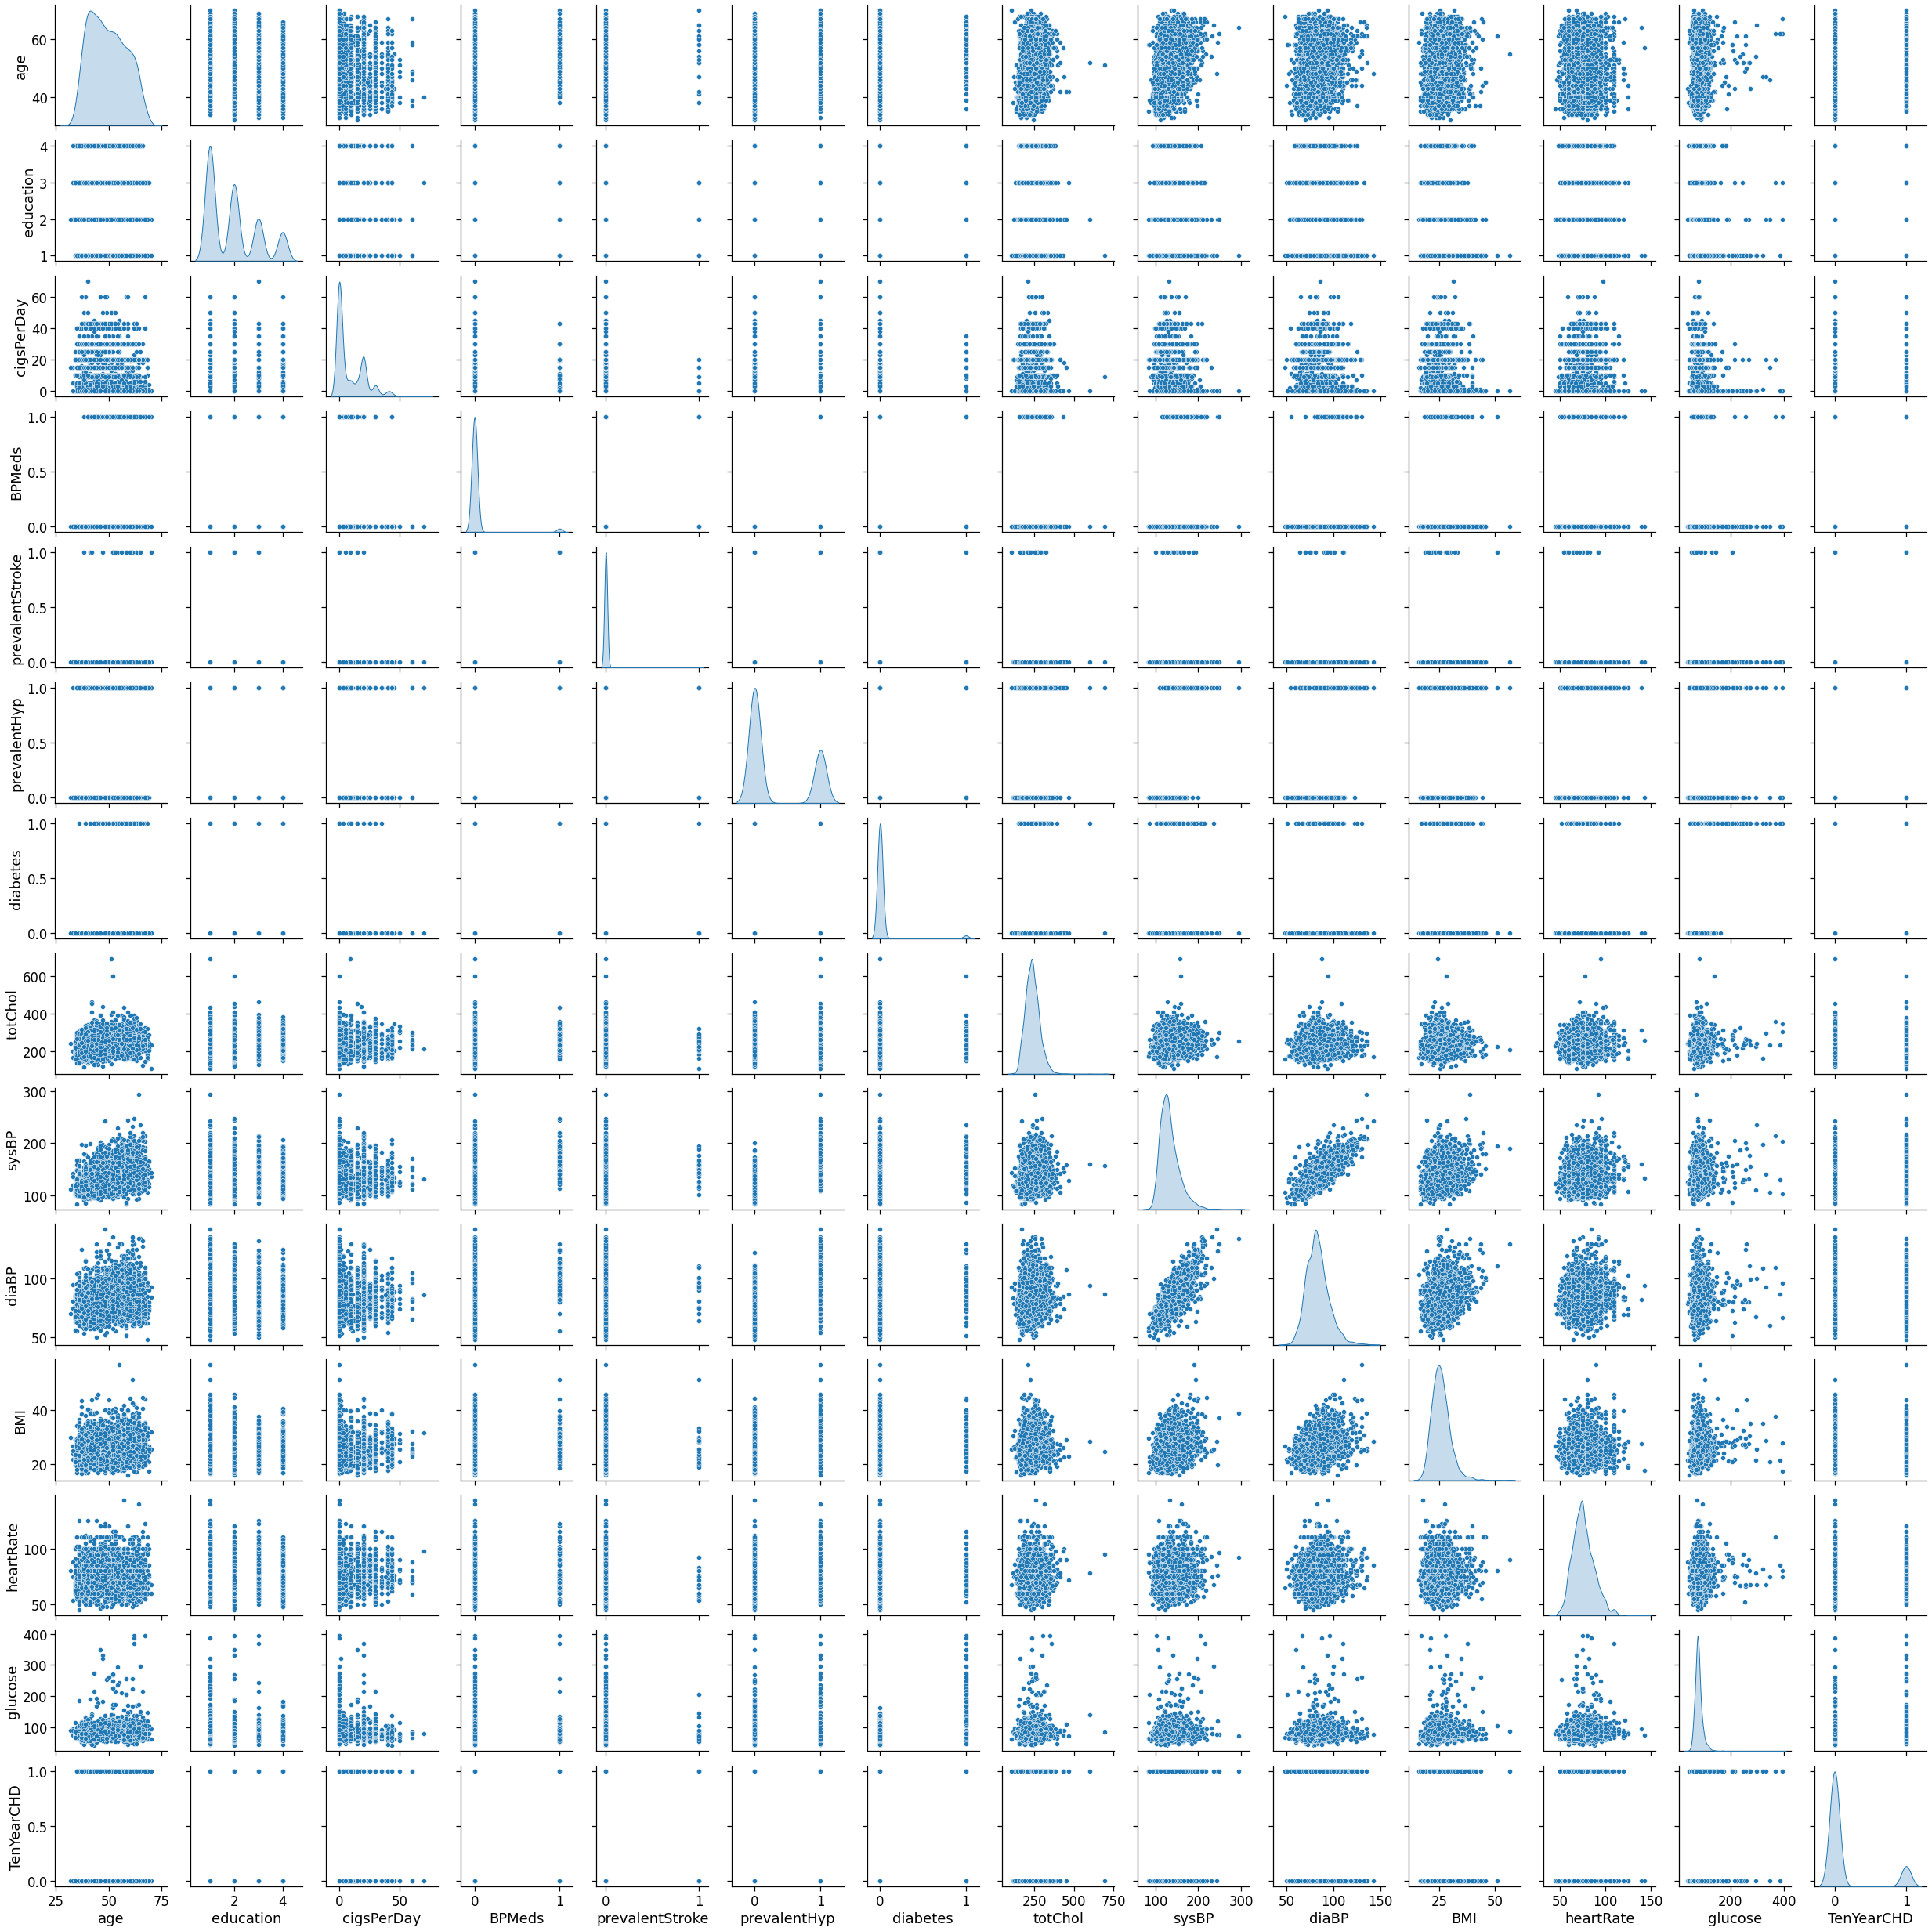

In [67]:
# Pair plot Univariate, bivariate and multivariate analysis in a single plot just for overview

plt.figure(figsize=(5,5))
sns.pairplot(data=df, kind='scatter', diag_kind='kde')
plt.show()

### **Plotting Stacked Bar-Chart**


---



In [68]:
from operator import add
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
  # Function to plot stacked bar chart
    default_colors = ['#005301', '#FA0001', '#267B41']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.65
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 15))

    for item in ([ax.title]):
        item.set_fontsize(17)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='10')

### **Stackplot- sex, smoking, diabetes,outcome, bp meds and hypertension vs CHD outcome**


---



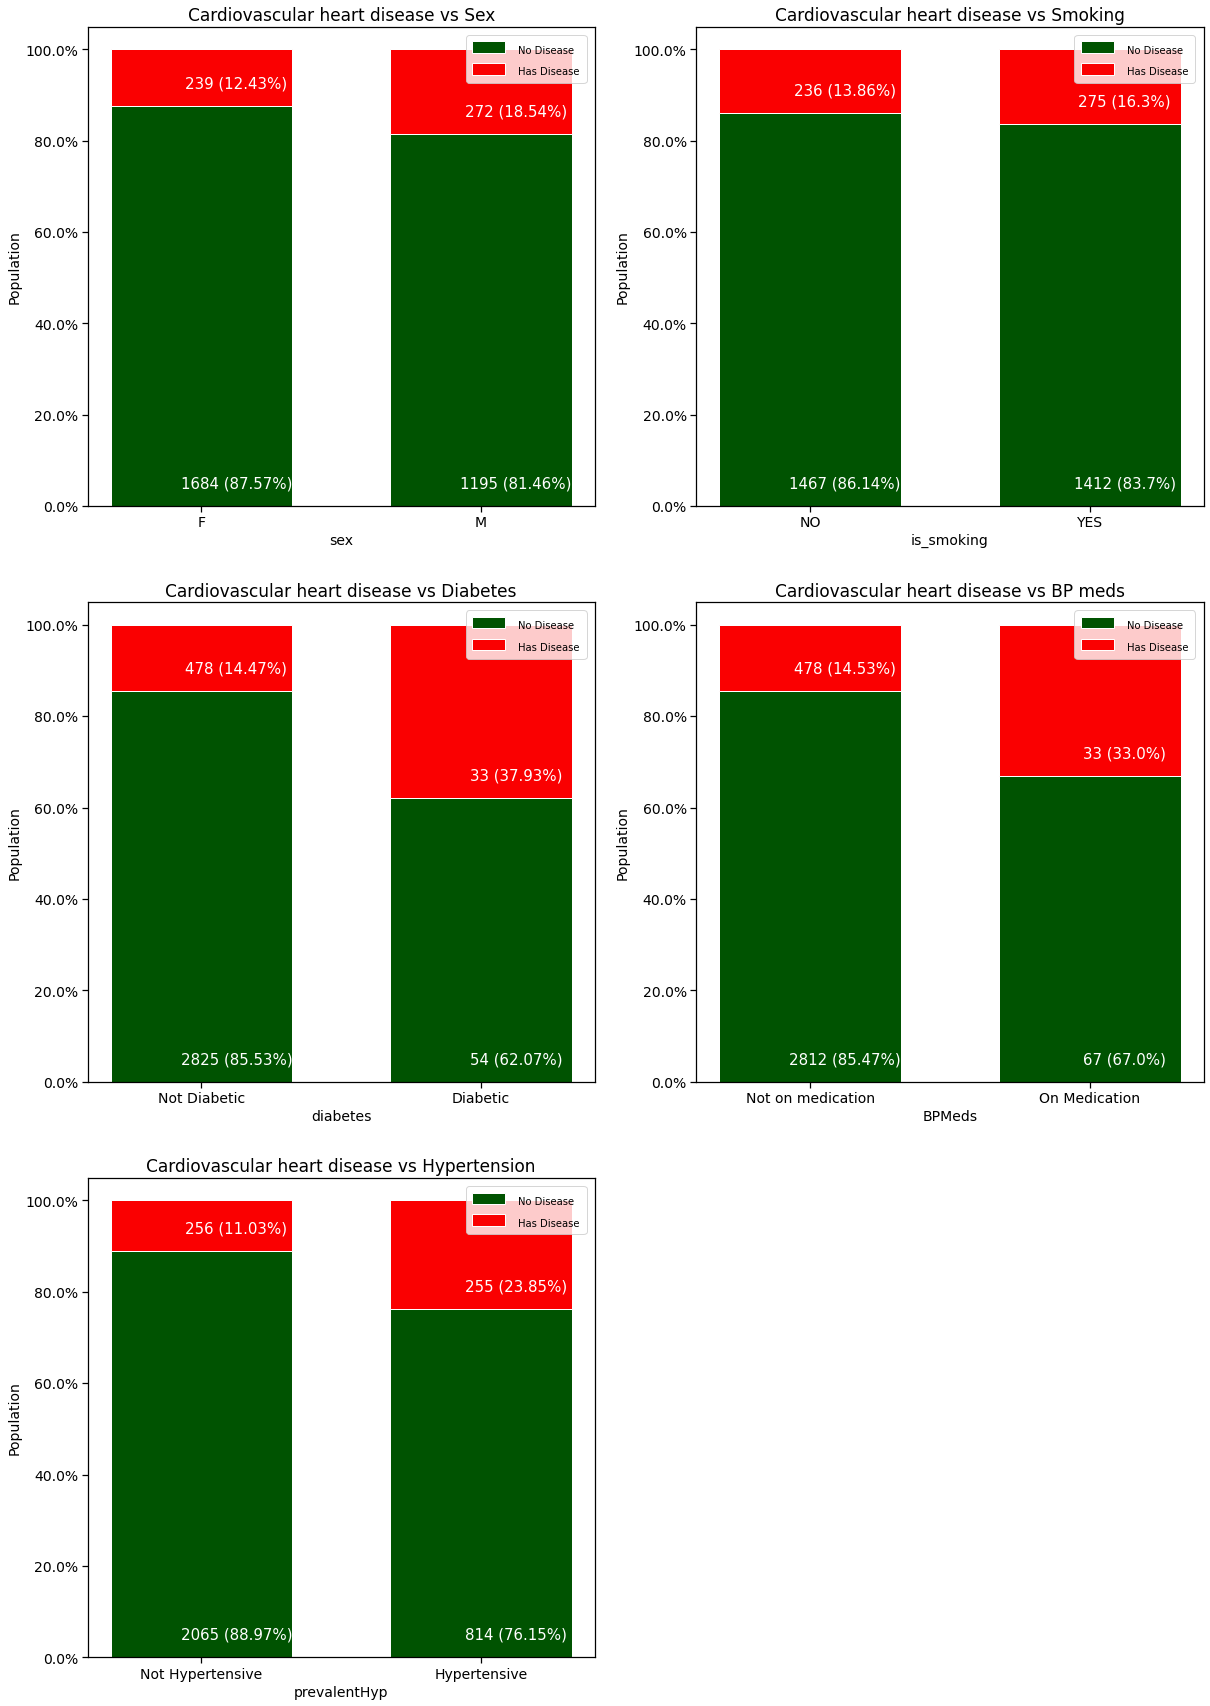

In [69]:
# Visualzing each category with respect to target variable
fig = plt.gcf()
fig.set_size_inches(20, 30)
grid_rows = 3
grid_cols = 2

#Plot sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = df[['sex','TenYearCHD']].groupby(['sex','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Sex', ylabel = 'Population')

#Plot smoking status vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = df[['is_smoking','TenYearCHD']].groupby(['is_smoking','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Smoking', ylabel = 'Population')

#Plot diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = df[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Diabetes', ylabel = 'Population')

#Plot BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = df[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs BP meds', ylabel = 'Population')

#Plot Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = df[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Hypertension', ylabel = 'Population')

### **From the above categorical variables comparison plot we can conclude that,**

- **Slightly more males are suffering from Cardiovascular heart disease than females.**

- **The people who have Cardiovascular heart disease is almost equal between smokers and non smokers.**

- **The percentage of people who have Cardiovascular heart disease is higher among the diabetic patients and also those patients with prevalent hypertension have more risk of Cardiovascular heart disease compare to those who don't have hypertensive problem.**

- **The percentage of people who are on medication of blood pressure have more risk of Cardiovascular heart disease compare to those who are not on medication**.

In [70]:
# other important libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from prettytable import PrettyTable

### **Defining dependent variables ,continuous independent variables and categorical independent variables separately**


---



In [71]:
# Defining 3 lists containing the column names of 
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute

dependent_var = ['TenYearCHD']
continuous_var = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

## **Distribution of the dependent variable:**


---



Text(0.5, 1.0, 'TenYearCHD distribution')

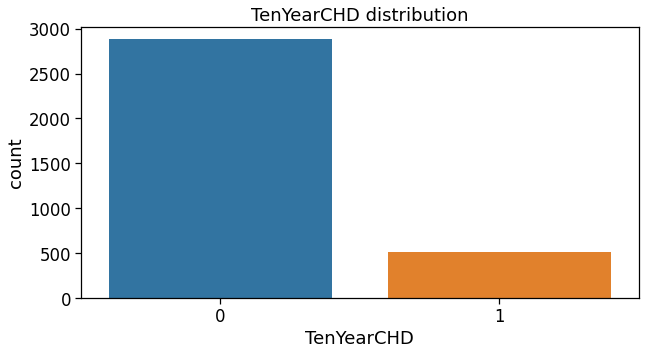

In [72]:
# Distribution of dependent varaible - TenYearCHD

plt.figure(figsize=(10,5))
sns.countplot(df[dependent_var[0]])
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')

**The dependent variable - 10 year risk of CHD is unbalanced.**

In [73]:
# Distribution of dependent variable
df[dependent_var].value_counts()

TenYearCHD
0             2879
1              511
dtype: int64

In [74]:
# unbalanced distribution
511/(2879+511)

0.15073746312684366

**The dependent variable - 10-year risk of coronary heart disease is unbalanced. Only ~15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.**

## **Analyzing the distribution of the continuous independent variables:**


---



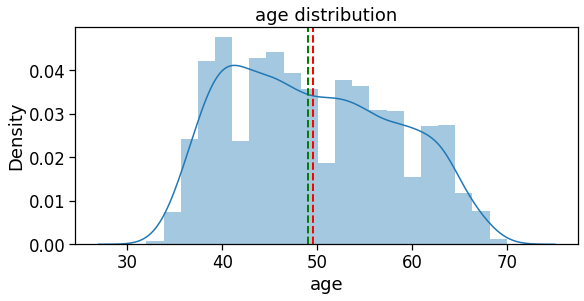

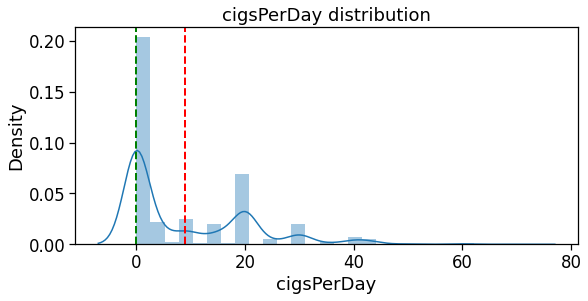

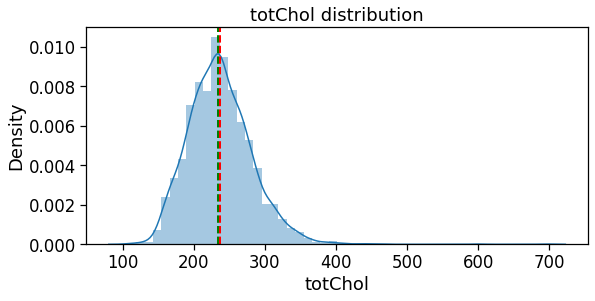

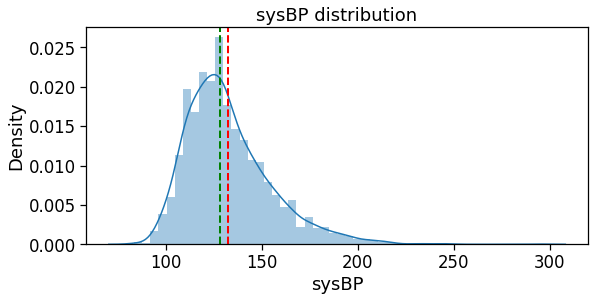

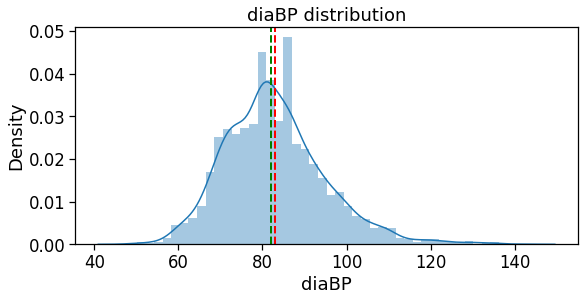

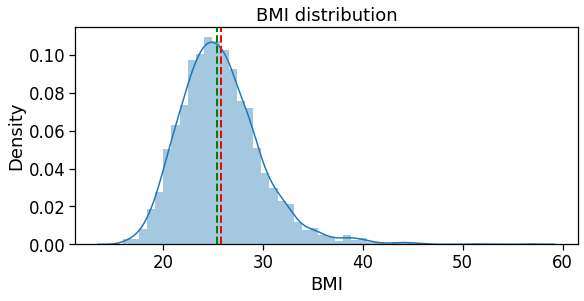

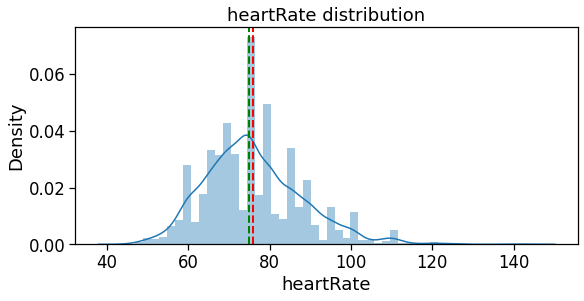

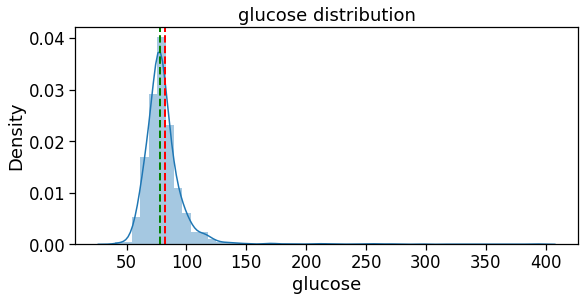

In [75]:
# Analysing the distribution of continuous variables in the dataset

for col in continuous_var:
  plt.figure(figsize=(9,4))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

**The distribution of several features is skewed, and contains outliers.**

### **Using IQR method**


---



In [76]:
# Handling outliers by standard methods and Plotting graphs:

pk1 = df.copy()
for col in numeric_features:


  # Using IQR method to define the range of inliners:

  q1, q3, median = pk1[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)
  

  # Replacing Outliers with median value:

  pk1[col] = np.where(pk1[col] > upper_limit, median,np.where(
                         pk1[col] < lower_limit,median,pk1[col]))

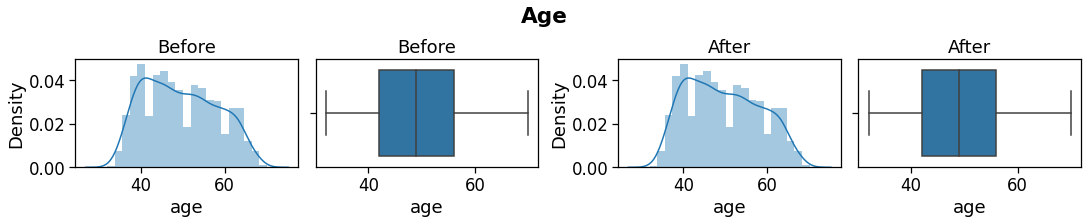

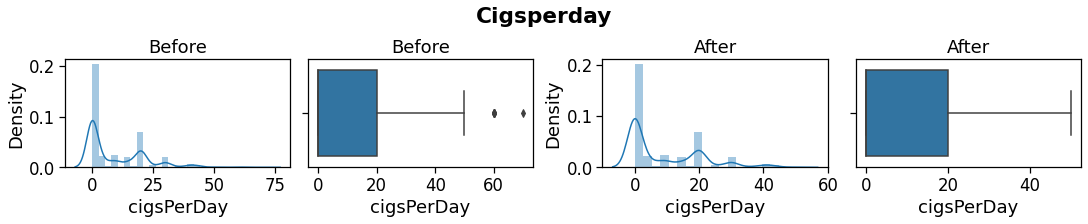

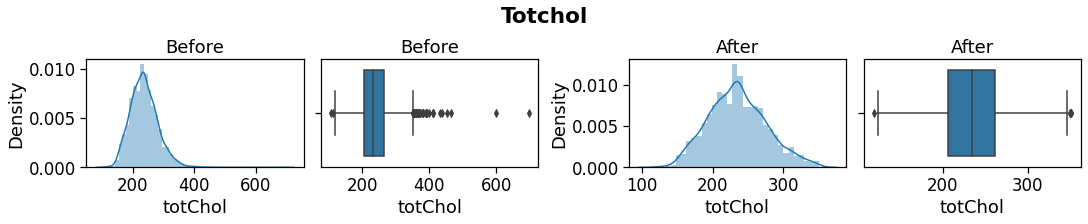

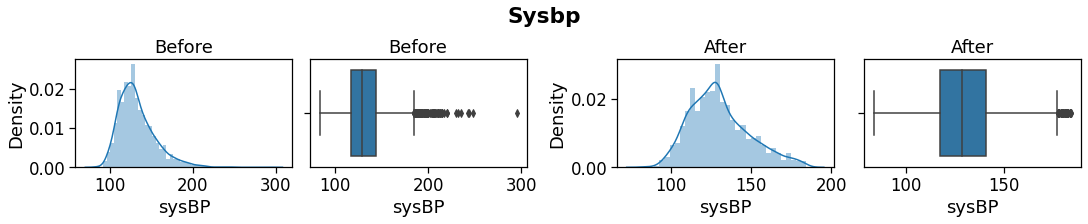

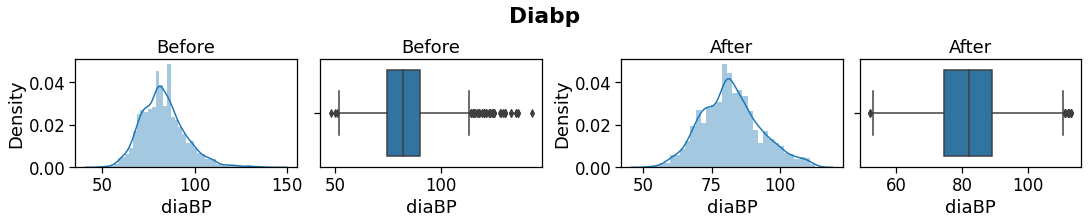

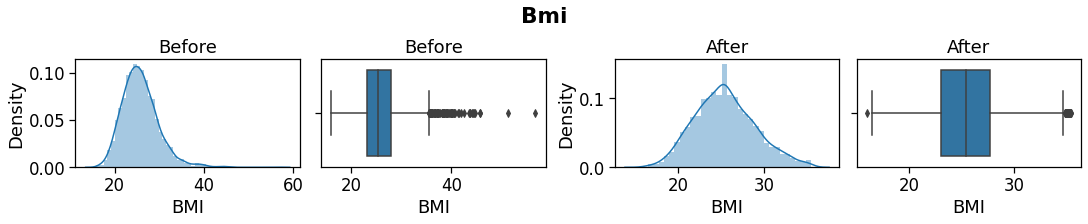

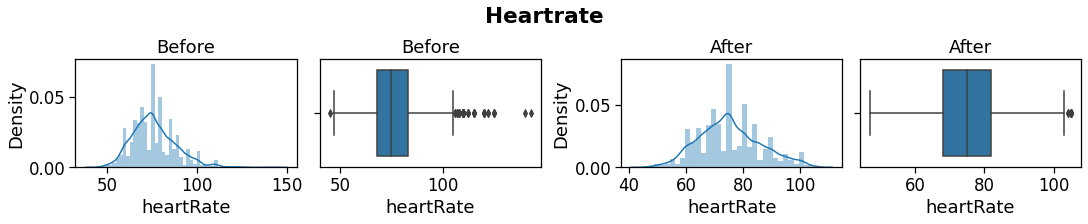

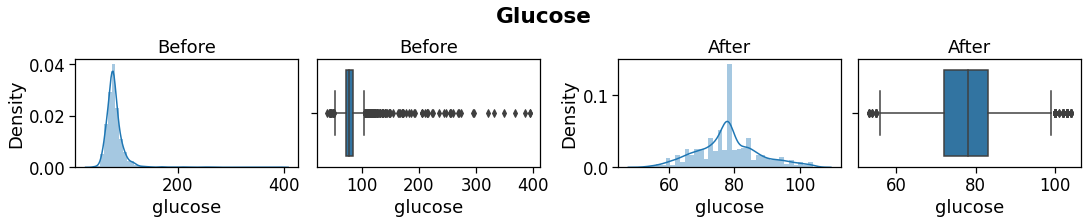

In [77]:
# After treating outliers :

for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")


  # After treating outliers :
  
  sns.distplot(pk1[col], ax=ax[2]).set(title="After")
  sns.boxplot(pk1[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

## **Analyzing the distribution of the discrete independent variables:**


---



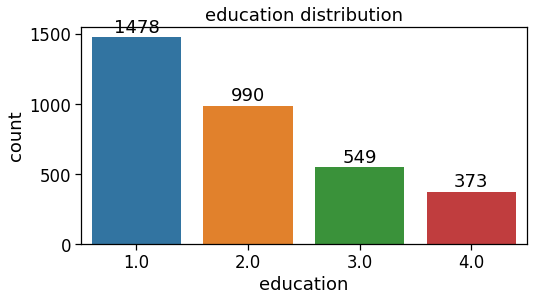

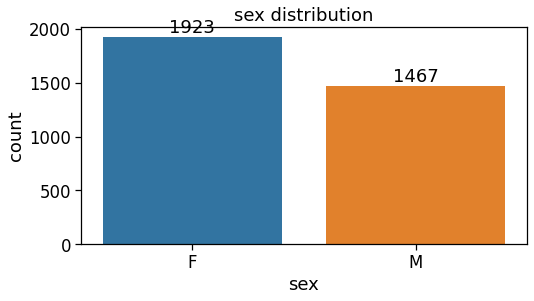

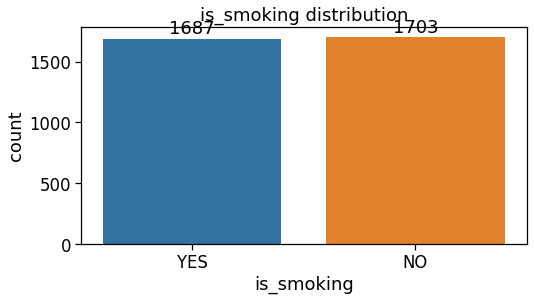

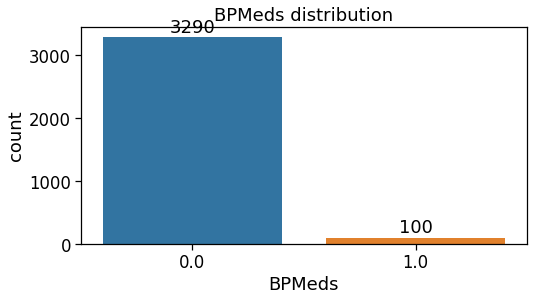

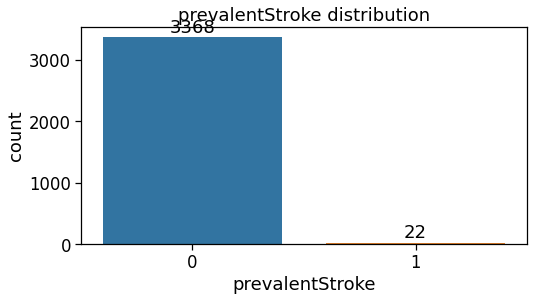

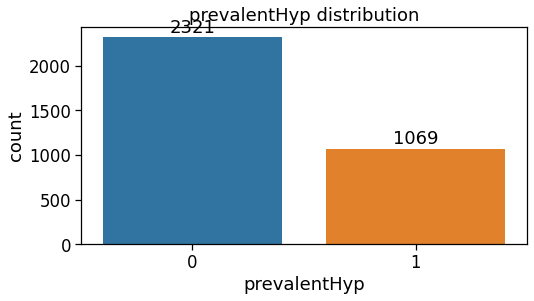

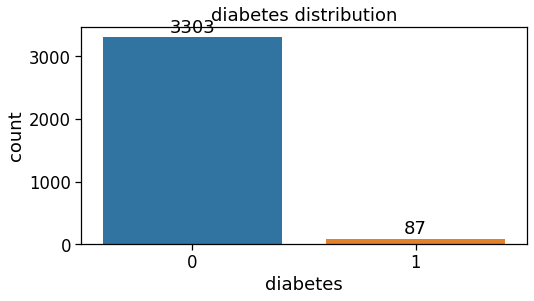

In [78]:
# Analysing the distribution of categorical variables in the dataset
for i in categorical_var:
  plt.figure(figsize=(8,4))
  p = sns.countplot(df[i])
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()


* **Almost half the patients are smokers.**
* **100 patients under the study are undertaking blood pressure medication.**
* **22 patients under the study have experienced a stroke.**
* **1069 patients have hypertension.**
* **87 patients have diabetes.**

## **Analyzing the relationship between the dependent variable and the continuous variables in the data:**


---



<Figure size 720x360 with 0 Axes>

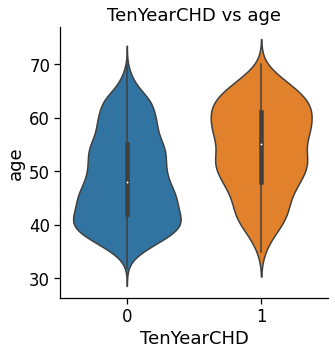

<Figure size 720x360 with 0 Axes>

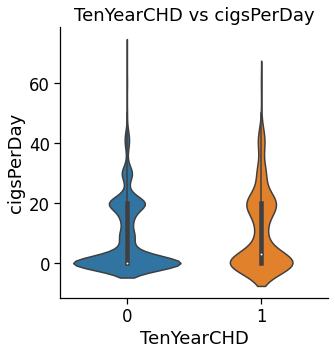

<Figure size 720x360 with 0 Axes>

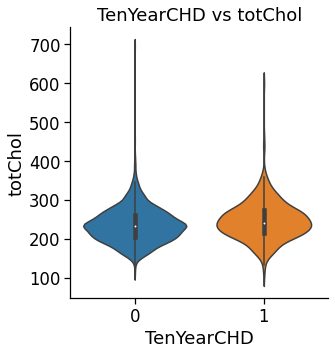

<Figure size 720x360 with 0 Axes>

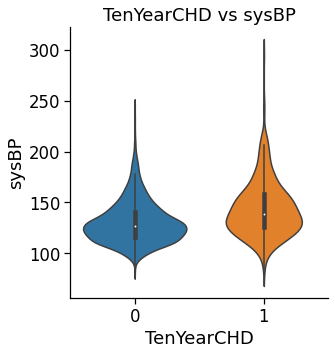

<Figure size 720x360 with 0 Axes>

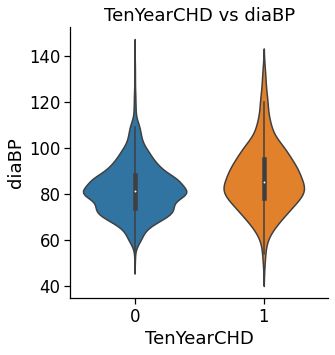

<Figure size 720x360 with 0 Axes>

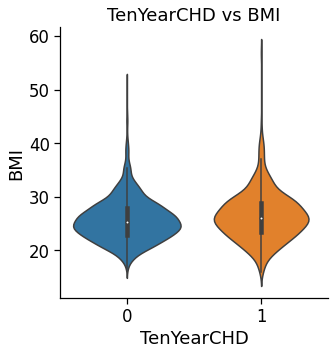

<Figure size 720x360 with 0 Axes>

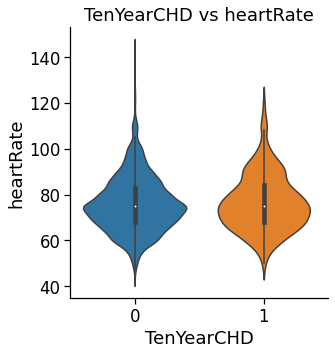

<Figure size 720x360 with 0 Axes>

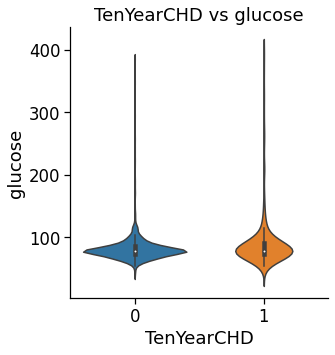

In [79]:
# Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=df,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()


* **The risk of CHD is higher for older patients than younger patients.**
* **No conclusive evidence on the risk of CHD with other continuous variables**

### **100% stacked bar chart of categorical values**


---



<Figure size 720x360 with 0 Axes>

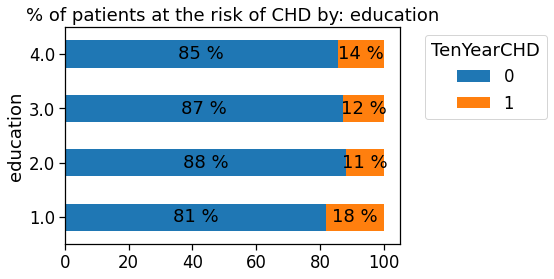

<Figure size 720x360 with 0 Axes>

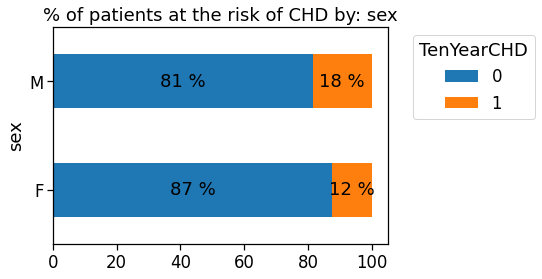

<Figure size 720x360 with 0 Axes>

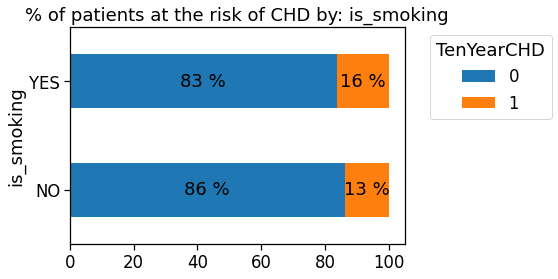

<Figure size 720x360 with 0 Axes>

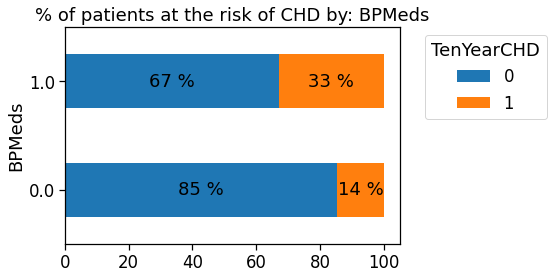

<Figure size 720x360 with 0 Axes>

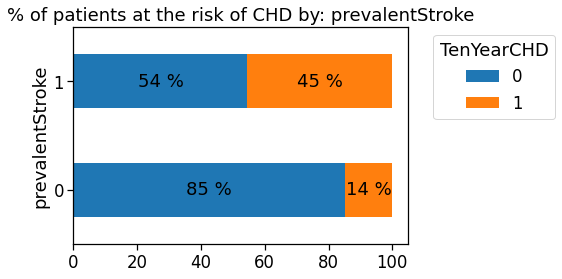

<Figure size 720x360 with 0 Axes>

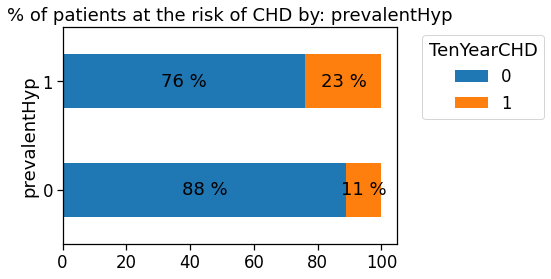

<Figure size 720x360 with 0 Axes>

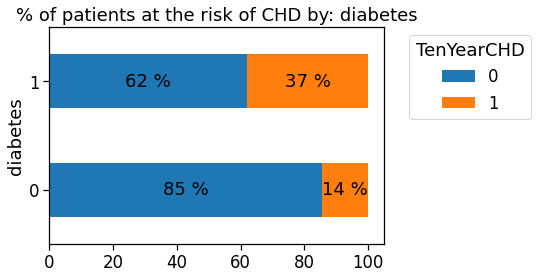

In [80]:
# 100% stacked bar chart

for i in categorical_var:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()


* **18%, 11%, 12%, 14% of the patients belonging to the education level 1, 2, 3, 4 respectively were eventually diagnosed with CHD.**
* **Male patients have significantly higher risk of CHD (18%) than female patients (12%)**
* **Patients who smoke have significantly higher risk of CHD (16%) than patients who don't smoke (13%)**
* **Patients who take BP medicines have significantly higher risk of CHD (33%) than other patients (14%)**
* **Patients who had experienced a stroke in their life have significantly higher risk of CHD (45%) than other patients (14%)**
* **Hypertensive patients have significantly higher risk of CHD (23%) than other patients (11%)**
* **Diabetic patients have significantly higher risk of CHD (37%) than other patients (14%)**

## **Correlation analysis:**


---



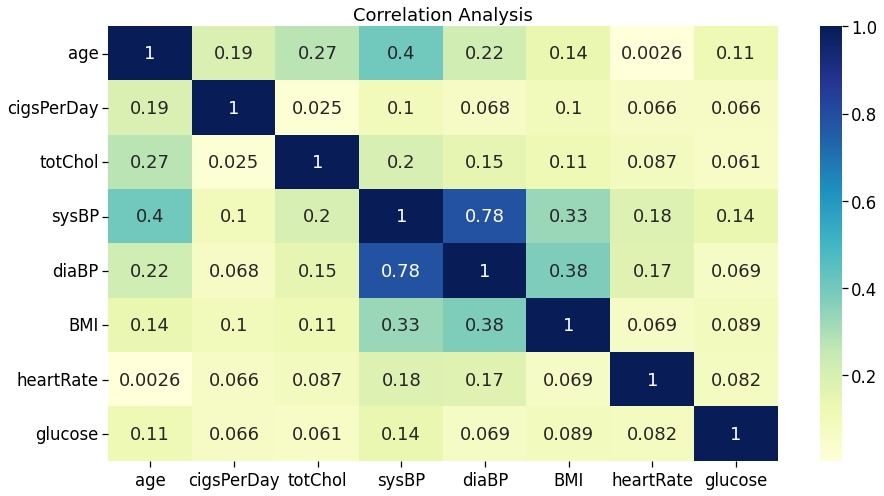

In [81]:
# Correlation magnitude
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlGnBu')

* **Above is the correlation magnitude heatmap for all the continuous variables in the dataset.**
* **The variables systolic BP and diastolic BP are highly correlated.**